In [1]:
from sklearn.decomposition import PCA
from pandas import DataFrame
import gensim.downloader as api
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def show_DataFrame(dic, index):
    return DataFrame(dic, index=index).applymap(lambda x: (x[0], round(x[1], 2))).T.fillna(0)

In [3]:
def plot_scatter(prjected_words_vectors, words, colors):
    plt.figure(figsize=(15,10))
    plt.scatter(prjected_words_vectors[:,0], prjected_words_vectors[:,1], linewidths=2, color=colors)
    for i, word in enumerate(words):
        plt.annotate(word, xy=(prjected_words_vectors[i,0]-0.1, prjected_words_vectors[i,1]+0.08))

In [4]:
wv_from_bin = api.load("glove-wiki-gigaword-200")

[==================================================] 100.0% 252.1/252.1MB downloaded


# Question 1

In [6]:
words = ['ali', 'brother', 'iran', 'nuclear', 'liverpool', 'england', 'book', 'university', 'soldier', 'mother']    # Question 1

similar_words = dict()
for word in words:
    similar_words[word] = sorted(wv_from_bin.most_similar(word), key=lambda item: item[1], reverse=True)

show_DataFrame(similar_words, [f'Word {i + 1}' for i in range(10)])

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10
ali,"(hassan, 0.67)","(ahmed, 0.65)","(mohammad, 0.65)","(mohammed, 0.65)","(muhammad, 0.63)","(ahmad, 0.61)","(akbar, 0.61)","(khan, 0.61)","(saleh, 0.6)","(ibrahim, 0.58)"
brother,"(son, 0.89)","(father, 0.86)","(nephew, 0.86)","(cousin, 0.83)","(uncle, 0.83)","(grandson, 0.76)","(sons, 0.74)","(elder, 0.73)","(grandfather, 0.73)","(eldest, 0.73)"
iran,"(tehran, 0.8)","(iranian, 0.79)","(syria, 0.68)","(nuclear, 0.66)","(iranians, 0.65)","(iraq, 0.65)","(ahmadinejad, 0.62)","(enrichment, 0.61)","(libya, 0.61)","(arabia, 0.6)"
nuclear,"(atomic, 0.78)","(weapons, 0.73)","(reactor, 0.69)","(reactors, 0.68)","(iran, 0.66)","(enrichment, 0.65)","(pyongyang, 0.64)","(proliferation, 0.64)","(plutonium, 0.64)","(uranium, 0.63)"
liverpool,"(manchester, 0.8)","(anfield, 0.74)","(newcastle, 0.72)","(leeds, 0.72)","(chelsea, 0.71)","(everton, 0.69)","(blackburn, 0.67)","(portsmouth, 0.67)","(tottenham, 0.67)","(southampton, 0.66)"
england,"(wales, 0.71)","(scotland, 0.65)","(ireland, 0.64)","(australia, 0.62)","(manchester, 0.6)","(cricket, 0.6)","(indies, 0.6)","(yorkshire, 0.58)","(lancashire, 0.58)","(english, 0.58)"
book,"(books, 0.85)","(author, 0.77)","(novel, 0.75)","(published, 0.75)","(memoir, 0.7)","(wrote, 0.7)","(written, 0.7)","(essay, 0.68)","(biography, 0.68)","(autobiography, 0.68)"
university,"(professor, 0.79)","(graduate, 0.77)","(harvard, 0.76)","(college, 0.75)","(yale, 0.73)","(faculty, 0.73)","(stanford, 0.68)","(universities, 0.68)","(campus, 0.68)","(student, 0.67)"
soldier,"(soldiers, 0.75)","(wounded, 0.73)","(policeman, 0.7)","(army, 0.65)","(killed, 0.63)","(prisoner, 0.62)","(dead, 0.6)","(serviceman, 0.6)","(man, 0.59)","(sergeant, 0.58)"
mother,"(daughter, 0.86)","(wife, 0.86)","(grandmother, 0.84)","(husband, 0.81)","(sister, 0.8)","(father, 0.79)","(her, 0.78)","(daughters, 0.76)","(woman, 0.76)","(she, 0.75)"


# Question 2

In [7]:
words_groups = [['ali', 'man', 'woman'],       # Question 2
                ['footbal', 'basketball', 'war'],
                ['laptop', 'phone', 'gasoline'],
                ['university', 'school', 'police'],
                ['pen', 'pencil', 'charger'],]


distances = dict()
for w1, w2, w3 in words_groups:
    distances[w1] = [(w2, wv_from_bin.distance(w1, w2)), (w3, wv_from_bin.distance(w1, w3))]

show_DataFrame(distances, ['Near Word', 'Far Word'])

,Near Word,Far Word
ali,"(man, 0.69)","(woman, 0.76)"
footbal,"(basketball, 0.87)","(war, 1.16)"
laptop,"(phone, 0.49)","(gasoline, 0.79)"
university,"(school, 0.36)","(police, 0.72)"
pen,"(pencil, 0.5)","(charger, 0.99)"


# Question 3

In [8]:
words_groups = [['king',        'woman',    'man' ],
                ['actor',       'girl',     'boy' ],
                ['doctor',      'she',      'he'  ],
                ['homemaker',   'she',      'he'  ],
                ['football',    'woman',    'man' ]]


first_distances = dict()
second_distances = dict()
for w1, w2, w3 in words_groups:
    first_distances[str((str(w1), w2, w3))] = sorted(wv_from_bin.most_similar(positive=[w1, w2], negative=[w3]), key=lambda item: item[1], reverse=True)
    second_distances[str((w1, w2, w3))] = sorted(wv_from_bin.most_similar(positive=[w1, w3], negative=[w2]), key=lambda item: item[1], reverse=True)

In [9]:
show_DataFrame(first_distances, [f'Word {i + 1}' for i in range(10)])

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10
"('king', 'woman', 'man')","(queen, 0.7)","(princess, 0.61)","(monarch, 0.59)","(throne, 0.58)","(prince, 0.58)","(elizabeth, 0.55)","(daughter, 0.54)","(kingdom, 0.53)","(mother, 0.52)","(crown, 0.52)"
"('actor', 'girl', 'boy')","(actress, 0.87)","(starring, 0.71)","(actresses, 0.69)","(actors, 0.69)","(starred, 0.68)","(screenwriter, 0.63)","(comedian, 0.63)","(film, 0.61)","(movie, 0.6)","(filmmaker, 0.58)"
"('doctor', 'she', 'he')","(nurse, 0.7)","(mother, 0.6)","(woman, 0.6)","(her, 0.59)","(physician, 0.57)","(pregnant, 0.57)","(dr., 0.56)","(doctors, 0.56)","(patient, 0.55)","(hospital, 0.55)"
"('homemaker', 'she', 'he')","(housewife, 0.71)","(schoolteacher, 0.61)","(widowed, 0.55)","(businesswoman, 0.55)","(mom, 0.55)","(waitress, 0.53)","(hairdresser, 0.53)","(mother, 0.52)","(socialite, 0.52)","(grandmother, 0.51)"
"('football', 'woman', 'man')","(basketball, 0.67)","(soccer, 0.64)","(volleyball, 0.58)","(league, 0.55)","(softball, 0.55)","(hockey, 0.54)","(rugby, 0.53)","(ncaa, 0.52)","(club, 0.52)","(collegiate, 0.52)"


In [10]:
show_DataFrame(second_distances, [f'Word {i + 1}' for i in range(10)])

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10
"('king', 'woman', 'man')","(prince, 0.55)","(ii, 0.54)","(brother, 0.54)","(iii, 0.53)","(reign, 0.53)","(uncle, 0.52)","(kingdom, 0.5)","(henry, 0.5)","(kings, 0.5)","(iv, 0.48)"
"('actor', 'girl', 'boy')","(comedian, 0.61)","(starring, 0.6)","(actors, 0.58)","(starred, 0.56)","(movie, 0.55)","(brother, 0.55)","(father, 0.55)","(film, 0.53)","(musician, 0.53)","(filmmaker, 0.52)"
"('doctor', 'she', 'he')","(physician, 0.66)","(surgeon, 0.57)","(doctors, 0.57)","(medical, 0.56)","(him, 0.54)","(dr., 0.54)","(himself, 0.53)","(his, 0.52)","(hospital, 0.52)","(man, 0.51)"
"('homemaker', 'she', 'he')","(43-year, 0.59)","(schoolteacher, 0.59)","(42-year, 0.55)","(housewife, 0.55)","(55-year, 0.54)","(48-year, 0.53)","(bricklayer, 0.53)","(47-year, 0.52)","(44-year, 0.52)","(39-year, 0.52)"
"('football', 'woman', 'man')","(soccer, 0.68)","(baseball, 0.64)","(team, 0.63)","(basketball, 0.62)","(league, 0.62)","(players, 0.61)","(rugby, 0.61)","(club, 0.6)","(game, 0.58)","(hockey, 0.58)"


# Question 4

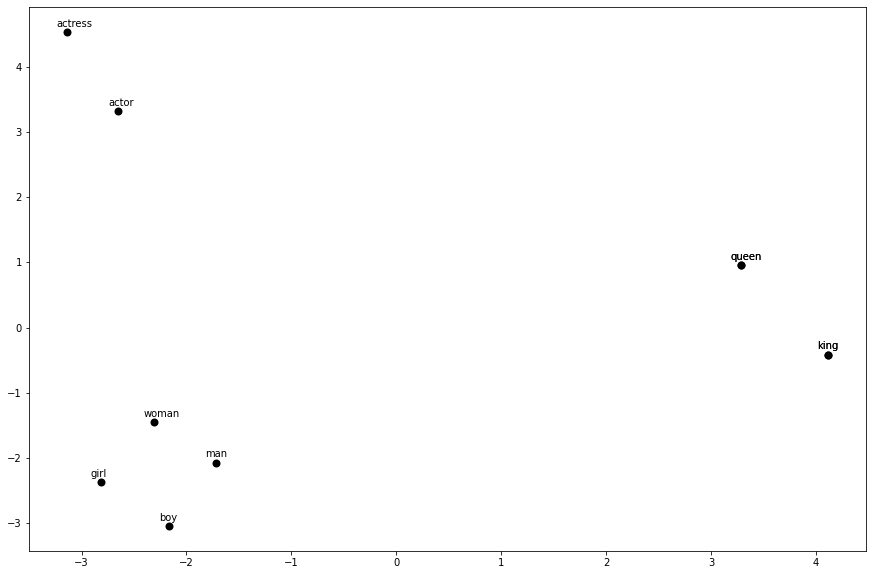

In [11]:
words = ['woman', 'man', 'king', 'queen', 'boy', 'girl', 'actor', 'actress', 'king', 'queen']
words_vectors = [wv_from_bin.get_vector(word) for word in words]

pca = PCA(n_components=3)
prjected_words_vectors = pca.fit_transform(words_vectors)

plot_scatter(prjected_words_vectors, words, 'black')

# Question 5

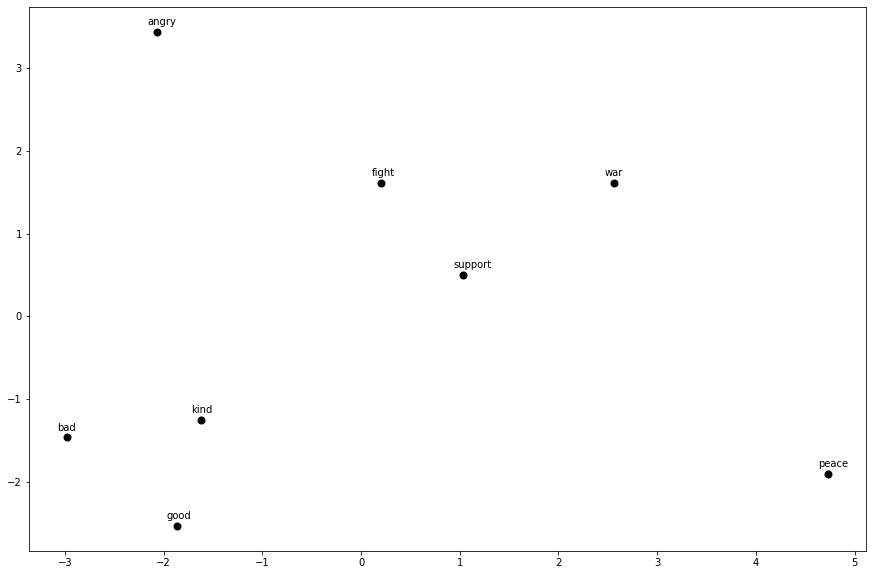

In [16]:
# Question 5
words = ['peace', 'war', 'kind', 'angry', 'support', 'fight', 'good', 'bad']
words_vectors = [wv_from_bin.get_vector(word) for word in words]

pca = PCA(n_components=3)
prjected_words_vectors = pca.fit_transform(words_vectors)

plot_scatter(prjected_words_vectors, words, 'black')

# Question 6

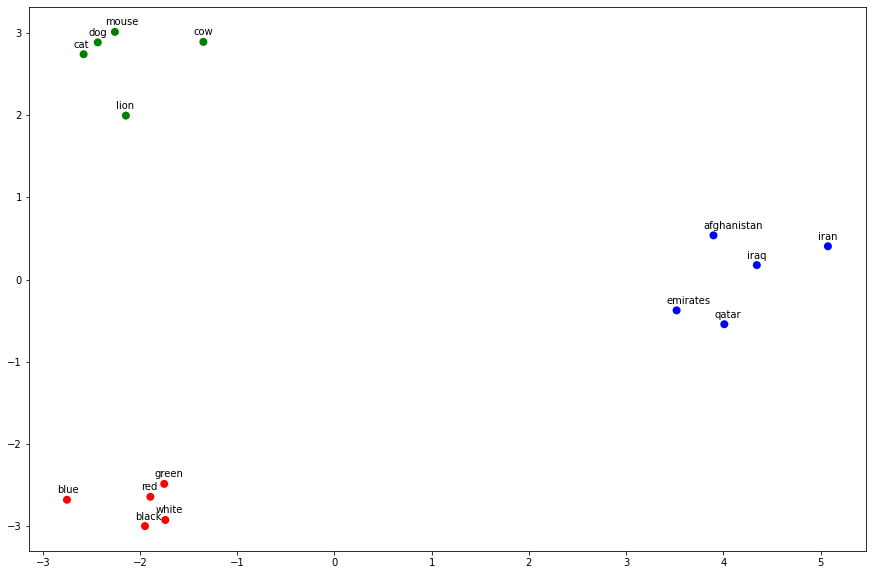

In [17]:
words_group1 = ['cat', 'dog', 'mouse', 'cow', 'lion']
words_group2 = ['iran', 'iraq', 'qatar', 'emirates', 'afghanistan']
words_group3 = ['green', 'blue', 'red', 'white', 'black']

words_group1_vectors = [wv_from_bin.get_vector(word) for word in words_group1]
words_group2_vectors = [wv_from_bin.get_vector(word) for word in words_group2]
words_group3_vectors = [wv_from_bin.get_vector(word) for word in words_group3]

words = np.array(words_group1 + words_group2 + words_group3)
colors = ['green']*len(words_group1) + ['blue']*len(words_group2) + ['red']*len(words_group3)
words_vectors = np.array(words_group1_vectors + words_group2_vectors + words_group3_vectors)

pca = PCA(n_components=3)
prjected_words_vectors = pca.fit_transform(words_vectors)

plot_scatter(prjected_words_vectors, words, colors)

# Question 7

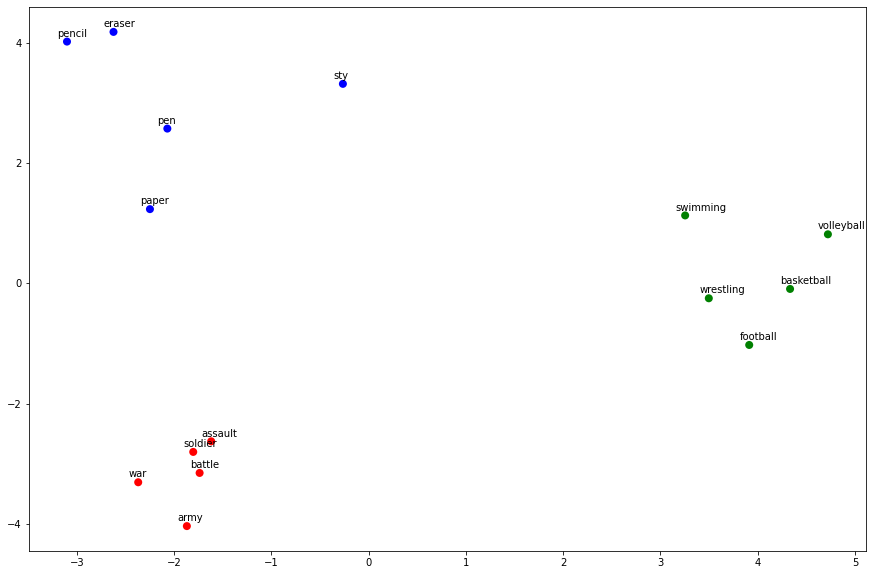

In [18]:
# Question 7
words_group1 = ['football', 'basketball', 'volleyball', 'wrestling', 'swimming']
words_group2 = ['paper', 'pen', 'pencil', 'eraser', 'sty']
words_group3 = ['war', 'soldier', 'battle', 'army', 'assault']

words_group1_vectors = [wv_from_bin.get_vector(word) for word in words_group1]
words_group2_vectors = [wv_from_bin.get_vector(word) for word in words_group2]
words_group3_vectors = [wv_from_bin.get_vector(word) for word in words_group3]

words = np.array(words_group1 + words_group2 + words_group3)
colors = ['green']*len(words_group1) + ['blue']*len(words_group2) + ['red']*len(words_group3)
words_vectors = np.array(words_group1_vectors + words_group2_vectors + words_group3_vectors)

pca = PCA(n_components=3)
prjected_words_vectors = pca.fit_transform(words_vectors)

plot_scatter(prjected_words_vectors, words, colors)

# Question 8

In [19]:
many_dict = dict()
many_dict[str(('many', 'cow', 'one'))] = wv_from_bin.most_similar(positive=['many', 'cow'], negative=['one'])
show_DataFrame(many_dict, [f'Word {i + 1}' for i in range(10)])

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10
"('many', 'cow', 'one')","(cows, 0.64)","(cattle, 0.56)","(mad, 0.56)","(sheep, 0.56)","(pigs, 0.56)","(bovine, 0.56)","(herds, 0.56)","(beef, 0.53)","(chickens, 0.52)","(bse, 0.5)"


In [20]:
many_dict = dict()
many_dict[str(('young', 'cow', 'old'))] = wv_from_bin.most_similar(positive=['young', 'cow'], negative=['old'])
show_DataFrame(many_dict, [f'Word {i + 1}' for i in range(10)])

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10
"('young', 'cow', 'old')","(mad, 0.6)","(cows, 0.58)","(sheep, 0.52)","(pigs, 0.52)","(herd, 0.51)","(bovine, 0.5)","(cattle, 0.49)","(infected, 0.48)","(spongiform, 0.48)","(animals, 0.48)"


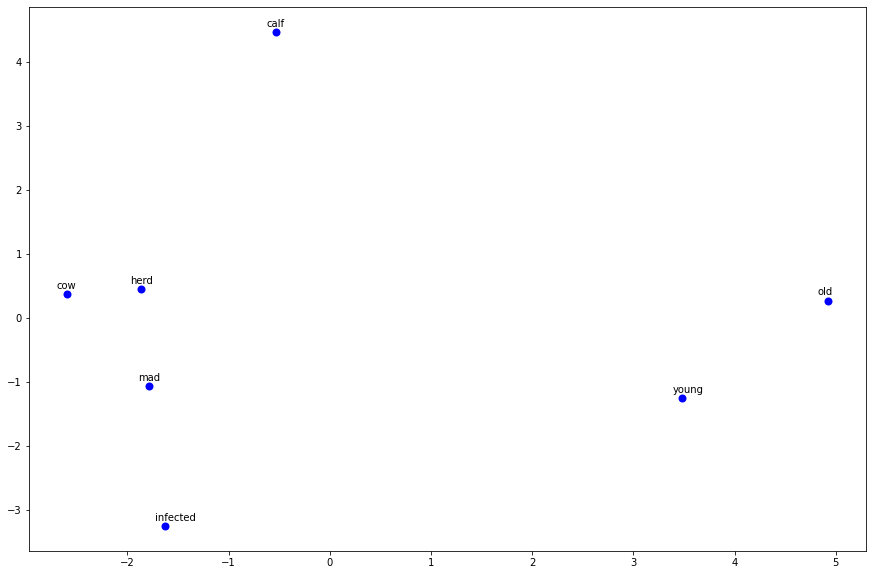

In [21]:
# Question 8
words_group = ['cow', 'calf', 'old', 'young', 'mad', 'infected', 'herd']
words_group_vectors = [wv_from_bin.get_vector(word) for word in words_group]
words = np.array(words_group)
words_vectors = np.array(words_group_vectors)
pca = PCA(n_components=3)
prjected_words_vectors = pca.fit_transform(words_vectors)
plot_scatter(prjected_words_vectors, words, 'blue')